## Q3

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from Utils import *
from Templates import *
from torch.utils.data import Dataset, DataLoader

In [10]:
trainset = DataAugment('./dataset/',train= True,type= 2)
train_loader = DataLoader(trainset, batch_size = 1, shuffle = True)

testset = DataAugment('./dataset/',train= False,type = 2)
test_loader = DataLoader(testset, batch_size = 4, shuffle = True)

In [11]:
epochs = 10
lr = 1e-3
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
log_interval = 20
trained = True
path = './Models/'
save = True

net = Model_Q2().to(device)
crt1 = nn.MSELoss()
crt2 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr) 


train_losses = []
train_loss = 0

if trained:
    d = torch.load(path+'q3.pth')
    train_losses = d['train_losses']
    net.load_state_dict(d['state_dict'])

In [12]:
idx,data = next(enumerate(train_loader))
# net(data['x'])[0][:,1].shape
print(data['y_cy'])

tensor([0.4821])


In [26]:
for e in range(epochs):
    net.train()
    for idx, data in enumerate(train_loader):
        inpt = data['x'].to(device)
        r = data['y_r'].to(device); cx = data['y_cx'].to(device); cy = data['y_cy'].to(device)
        label = data['y_label'].to(device)
        
#         print(rprobs.shape,label.shape)|
        
        optimizer.zero_grad()
        cprobs, rprobs = net(inpt)        
        loss =  crt1(rprobs[:,0],r) + crt1(rprobs[:,1],cx) + crt1(rprobs[:,2],cy) + crt2(cprobs,label)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if idx %log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, idx, len(train_loader),
                100. * idx/ len(train_loader), loss.item()))
            d = {'state_dict':net.state_dict(), 'train_losses': train_losses}
            torch.save(d,path + 'q3.pth')
            print("Model Saved Epoch: {},Idx:{}".format(e,idx))
        
    train_loss /= len(train_loader.dataset)
    train_loss.append(train_loss)

Train Epoch: 0 [0/60000 (0%)]	Loss: 1.746376
Model Saved Epoch: 0,Idx:0
Train Epoch: 0 [20/60000 (0%)]	Loss: 2.184663
Model Saved Epoch: 0,Idx:20
Train Epoch: 0 [40/60000 (0%)]	Loss: 2.458233
Model Saved Epoch: 0,Idx:40
Train Epoch: 0 [60/60000 (0%)]	Loss: 1.514953
Model Saved Epoch: 0,Idx:60
Train Epoch: 0 [80/60000 (0%)]	Loss: 1.503891
Model Saved Epoch: 0,Idx:80
Train Epoch: 0 [100/60000 (0%)]	Loss: 1.554910
Model Saved Epoch: 0,Idx:100
Train Epoch: 0 [120/60000 (0%)]	Loss: 2.443725
Model Saved Epoch: 0,Idx:120
Train Epoch: 0 [140/60000 (0%)]	Loss: 2.453284
Model Saved Epoch: 0,Idx:140
Train Epoch: 0 [160/60000 (0%)]	Loss: 1.467183
Model Saved Epoch: 0,Idx:160
Train Epoch: 0 [180/60000 (0%)]	Loss: 1.498439
Model Saved Epoch: 0,Idx:180
Train Epoch: 0 [200/60000 (0%)]	Loss: 1.489072
Model Saved Epoch: 0,Idx:200
Train Epoch: 0 [220/60000 (0%)]	Loss: 1.640560
Model Saved Epoch: 0,Idx:220
Train Epoch: 0 [240/60000 (0%)]	Loss: 1.468550
Model Saved Epoch: 0,Idx:240
Train Epoch: 0 [260/6000

KeyboardInterrupt: 

tensor([4, 0, 3, 9]) tensor([[0.3856, 0.5192, 0.5146],
        [0.3846, 0.4827, 0.4955],
        [0.3568, 0.4591, 0.5029],
        [0.3474, 0.4744, 0.5165]])


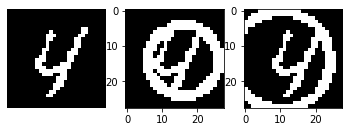

0.5446009389671361


In [13]:
idx,data = next(enumerate(test_loader))
with torch.no_grad():
    o1,o2 = net(data['x'])
print(o1.argmax(dim=1),o2)

plt.subplot(1,3,1)
plt.imshow(data['y_mask'][0][0],cmap = plt.cm.gray)
plt.axis('off')
plt.subplot(1,3,2)
img = data['y_mask'][0][0].numpy().astype(np.uint8); x= 28*data['y_cx'][0]; y = 28*data['y_cy'][0]; r = 28*data['y_r'][0]
cv2.circle(img, (int(x),int(y)),int(r),(1,0,0),thickness = 2)
plt.imshow(img,cmap = plt.cm.gray)

c1 = getMask(x,y,r)


plt.subplot(1,3,3)
img = data['y_mask'][0][0].numpy().astype(np.uint8); x= 28*o2[0,0]; y = 28*o2[0,1]; r = 28*o2[0,2]
cv2.circle(img, (int(x),int(y)),int(r),(1,0,0),thickness = 2)
plt.imshow(img,cmap = plt.cm.gray)


c2 = getMask(x,y,r)
plt.show()
print(np.logical_and(c1 , c2 ).sum()/np.logical_or(c1, c2 ).sum())

tensor(0)

In [8]:
JSim2(net,test_loader,device)

0.8126649076517151